import library

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.preprocessing import text, sequence
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
# from kaggle_datasets import KaggleDatasets
!pip install transformers
import transformers


from tokenizers import BertWordPieceTokenizer

     |████████████████████████████████| 2.3MB 13.9MB/s 
     |████████████████████████████████| 901kB 48.2MB/s 
     |████████████████████████████████| 3.3MB 48.1MB/s 


get dataset and split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# remove result
!cd /content/results


/bin/bash: line 0: cd: /content/results: No such file or directory


In [ ]:
train1 = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/train.csv')
valid_translated = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/valid_translated.csv')
valid = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/validation.csv')
test = pd.read_csv('/content/drive/MyDrive/Diplom/dataset/test.csv')

Tokenizer

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
print(len(train1))
train1 = train1[['comment_text', 'toxic']]

223549


In [ ]:
# convert file valid
valid_translated['comment_text'] = valid_translated['translated']
valid_translated['toxic'] = valid['toxic']

# valid_translated.drop(columns=['id'])
valid_translated = valid_translated[['comment_text','toxic']]
print(valid_translated)

                                           comment_text  toxic
0     this user doesn't even rise to the rank of her...      0
1     the text of this entry seems to be copied dire...      0
2     okay. I only expose my past. all past times we...      1
3     I have hesitations about continuing the issue ...      0
4     I guess you will take portekim as an example w...      0
...                                                 ...    ...
7995  the fact is that the minor characters page is ...      0
7996  the imbesil ete dela luna does not find out or...      1
7997                         Are you a negative maniac?      1
7998  The map of the reign of Alhaken is slightly ex...      0
7999  leave me your email please. anyway if you read...      0

[8000 rows x 2 columns]


method up sample and down sample ( now used upsample)


In [ ]:
toxic = train1[train1.toxic==1]
nontoxic = train1[train1.toxic==0]


# print(len(toxic))
# print(len(nontoxic))
# hin
train1 = pd.concat([toxic,toxic,toxic,toxic,toxic, nontoxic[:6*len(toxic)]])

# valid

print(train1)
# train1 = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
# print(train2.to_string())

                                             comment_text  toxic
6            COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1
12      Hey... what is it..\n@ | talk .\nWhat is it......      1
16      Bye! \n\nDon't look, come or think of comming ...      1
42      You are gay or antisemmitian? \n\nArchangel WH...      1
43               FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!      1
...                                                   ...    ...
141897  Sorry, but your answer wasn't good enough. Giv...      0
141899                                     Unblock Please      0
141900  (although you should read the caveats about th...      0
141901  "\n\n Fashion-Maga-Zine? \n\nWhy is Fashion-Ma...      0
141902  "\n\nQuestion\nMiss lilygirl, why r u still de...      0

[235224 rows x 2 columns]


In [ ]:
# print(np.where(train2.columns==1))

In [ ]:
# # up sample
# g = train1.groupby("toxic")
# print(g.)
# train1 = pd.concat(g)

In [ ]:
train1 = train1
valid = valid[:8000]
valid_translated = valid_translated[:8000]

In [ ]:
print(train1)

                                            comment_text  toxic
6           COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1
12     Hey... what is it..\n@ | talk .\nWhat is it......      1
16     Bye! \n\nDon't look, come or think of comming ...      1
42     You are gay or antisemmitian? \n\nArchangel WH...      1
43              FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!      1
...                                                  ...    ...
47412  "\n\n Request opinion of Muslim editor \n\nHel...      0
47413  "\n\nAlthough I respect your admiration for it...      0
47414  Gnip is on the right track here, though I woul...      0
47415  "::  Hello Jess!  Thanks for your help as it i...      0
47416  "==Username==\n\nPer here, it says that the us...      0

[88036 rows x 2 columns]


In [ ]:
from transformers import TFBertForSequenceClassification
from keras.utils import to_categorical

train_encodings = tokenizer(list(train1['comment_text']), truncation=True, padding=True, max_length=64)
# val_encodings = tokenizer(list(valid['comment_text']), truncation=True, padding=True, max_length=64)
val_encodings = tokenizer(list(valid_translated['comment_text']), truncation=True, padding=True, max_length=64)


train_labels = list(train1['toxic']) 
val_labels = list(valid['toxic'])
# train_labels = to_categorical(list(train1['toxic'])) 
# val_labels = to_categorical(list(valid['toxic']))

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))


In [ ]:
print(train_labels[42000:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

add metrics for predict result

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
# from transformers import TFBertForSequenceClassification, TFTrainer, TFTrainingArguments

# training_args = TFTrainingArguments(
#     output_dir='./results',          # output directory
#     num_train_epochs=2,              # total number of training epochs
#     per_device_train_batch_size=16,  # batch size per device during training
#     per_device_eval_batch_size=64,   # batch size for evaluation
#     warmup_steps=500,                # number of warmup steps for learning rate scheduler
#     weight_decay=0.01,               # strength of weight decay
#     # logging_dir='./logs',            # directory for storing logs
#     eval_accumulation_steps=5,
#     learning_rate=2e-5,
#     logging_steps=10,
#     overwrite_output_dir=True
# )

# with training_args.strategy.scope():
#     model = TFBertForSequenceClassification.from_pretrained("bert-base-cased")

# trainer = TFTrainer(
#     model=model,                         # the instantiated 🤗 Transformers model to be trained
#     args=training_args,                  # training arguments, defined above
#     train_dataset=train_dataset,         # training dataset
#     compute_metrics=compute_metrics,
#     eval_dataset=val_dataset             # evaluation dataset
# )

# trainer.train()

In [ ]:
# trainer.evaluate()

The function supports calculation of recall, precision and f1 score


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
# from transformers import TFDistilBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=1)
model.classifier = tf.keras.layers.Dense(
            units=1,
            name="classifier",
            activation="sigmoid"
        )

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, 
    loss='binary_crossentropy',
    metrics=['accuracy', precision_m, recall_m, f1_m]
  ) # can also use any keras loss fn
history = model.fit(train_dataset.shuffle(200000).batch(32), epochs=5, validation_data=val_dataset.batch(32), validation_batch_size=32,batch_size=32, verbose=1)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
2752/2752 [==============================] - 737s 260ms/step - loss: 0.2282 - accuracy: 0.9042 - precision_m: 0.9033 - recall_m: 0.8913 - f1_m: 0.8930 - val_loss: 0.3397 - val_accuracy: 0.8572 - val_precision_m: 0.5230 - val_recall_m: 0.7921 - val_f1_m: 0.6077
Epoch 2/5
2752/2752 [==============================] - 710s 258ms/step - loss: 0.1094 - accuracy: 0.9580 - precision_m: 0.9546 - recall_m: 0.9604 - f1_m: 0.9560 - val_loss: 0.3227 - val_accuracy: 0.8773 - val_precision_m: 0.5742 - val_recall_m: 0.8221 - val_f1_m: 0.6530
Epoch 3/5
2752/2752 [==============================] - 710s 258ms/step - loss: 0.0588 - accuracy: 0.9793 - precision_m: 0.9757 - recall_m: 0.9828 - f1_m: 0.9785 - val_loss: 0.3156 - val_accuracy: 0.9070 - val_precision_m: 0.6772 - val_recall_m: 0.7777 - val_f1_m: 0.7018
Epoch 4/5
2752/2752 [==============================] - 710s 258ms/step - loss: 0.0278 - accuracy: 0.9910 - precision_m: 0.9890 - recall_m: 0.9928 - f1_m: 0.9905 - val_loss: 0.3435 - val_a

In [ ]:
def visu(history, title='F1 and Accuracy'):
    fig = plt.figure()
    axs = fig.add_axes([0, 0, 1, 1])
    axs.set_title(title)
    axs.plot(history.history['f1_m'], label='F1 train')
    axs.plot(history.history['val_f1_m'], label='F1 valid')
    axs.plot(history.history['accuracy'], label='Accuracy train')
    axs.plot(history.history['val_accuracy'], label='Accuracy valid')
    axs.set_xlabel('Epochs')
    axs.set_ylabel('Percent')
    axs.set_ylim(0, 1)
    axs.legend()
    fig.show()

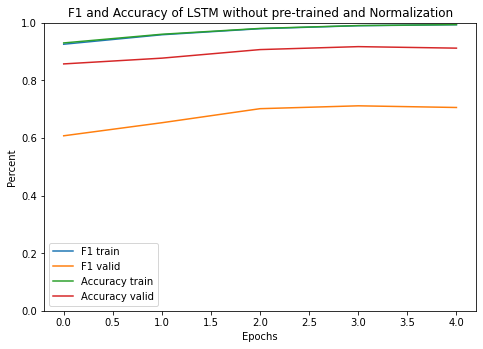

In [ ]:
visu(history, 'F1 and Accuracy of LSTM without pre-trained and Normalization')

In [ ]:
print(history.history)

{'loss': [0.1767968386411667, 0.10523703694343567, 0.05598033219575882, 0.029829880222678185, 0.018915938213467598], 'accuracy': [0.9301081299781799, 0.9602435231208801, 0.9804625511169434, 0.9903789162635803, 0.9936844110488892], 'precision_m': [0.9287416338920593, 0.9564070701599121, 0.9759379625320435, 0.9882494807243347, 0.9921422600746155], 'recall_m': [0.9278600215911865, 0.9635056853294373, 0.9846261739730835, 0.9923346638679504, 0.9949945211410522], 'f1_m': [0.9255912899971008, 0.9584837555885315, 0.9795370697975159, 0.9899210333824158, 0.9933419227600098], 'val_loss': [0.33971887826919556, 0.3226993978023529, 0.31564298272132874, 0.3435354232788086, 0.38933518528938293], 'val_accuracy': [0.8572499752044678, 0.8772500157356262, 0.9070000052452087, 0.9172499775886536, 0.9120000004768372], 'val_precision_m': [0.5229970812797546, 0.574202299118042, 0.6772258877754211, 0.7158222198486328, 0.6980236172676086], 'val_recall_m': [0.7920982837677002, 0.8220567107200623, 0.77771562337875